In [ ]:
#Creating the main df
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
the_df = pd.read_csv('../data/background-clean.csv')
the_df

,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,1,1,1,0,0,0,0,0,0,True
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
2,3,adv,4,int,4,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
3,4,adv,4,int,3,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
4,6,int,3,int,3,int,3,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
5,7,int,3,adv,5,adv,5,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
6,8,int,3,int,3,int,3,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
7,9,int,4,adv,4,adv,5,3-5,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
8,10,int,4,int,4,adv,4,9+,No,No preference,...,0,0,0,0,0,1,0,0,0,False
9,11,int,4,int,4,beg,3,0-2,Yes,No preference,...,0,0,0,0,0,0,0,0,0,True


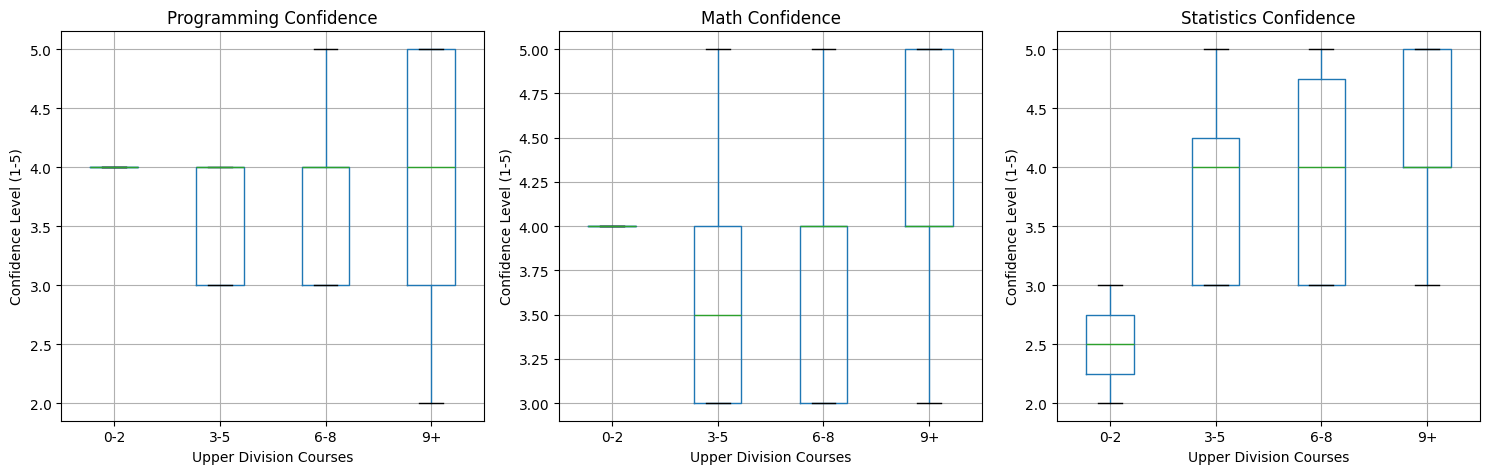

In [ ]:
#Boxplot to see if confidence level increases with increased number of upper div courses - all students
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

confidence_vars = ['prog.comf', 'math.comf', 'stat.comf']
titles = ['Programming Confidence', 'Math Confidence', 'Statistics Confidence']

for i, (var, title) in enumerate(zip(confidence_vars, titles)):
    the_df.boxplot(column=var, by='updv.num', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Upper Division Courses')
    axes[i].set_ylabel('Confidence Level (1-5)')
    axes[i].get_figure().suptitle('')

plt.tight_layout()
plt.show()

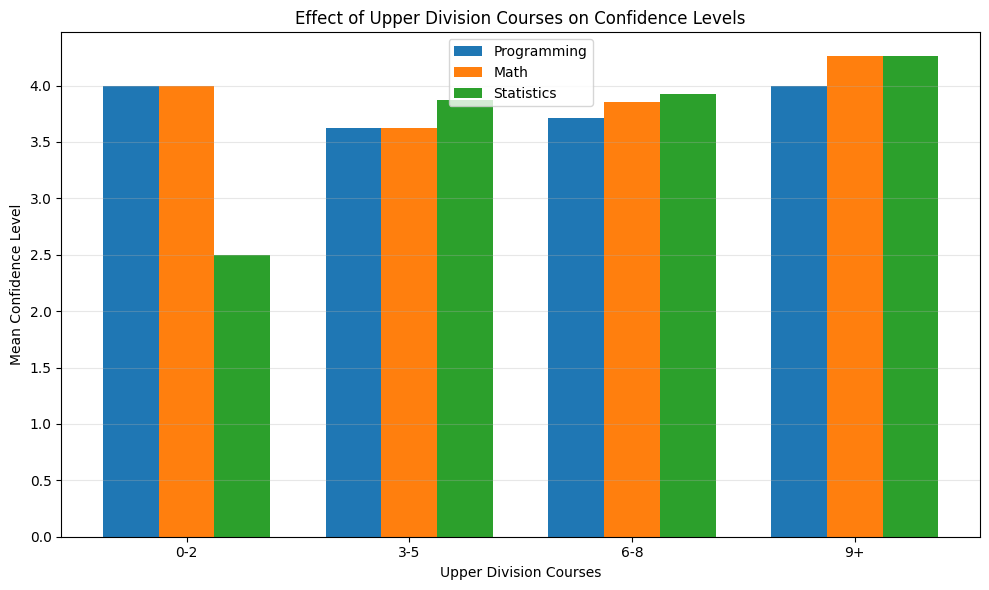

In [ ]:
#Bar plot to see if confidence level increases with increased number of upper div courses - all students
confidence_vars = ['prog.comf', 'math.comf', 'stat.comf']
categories = ['0-2', '3-5', '6-8', '9+']

means = the_df.groupby('updv.num')[confidence_vars].mean()

means = means.reindex(categories)

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(categories))
width = 0.25

bars1 = ax.bar(x - width, means['prog.comf'], width, label='Programming')
bars2 = ax.bar(x, means['math.comf'], width, label='Math')
bars3 = ax.bar(x + width, means['stat.comf'], width, label='Statistics')

ax.set_xlabel('Upper Division Courses')
ax.set_ylabel('Mean Confidence Level')
ax.set_title('Effect of Upper Division Courses on Confidence Levels')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Now, create two new databases for students who took PSTAT 126 and those who didn't to iscolate PSTAT and CS majors. PSTAT 126 is a prerequisite for the capstone so all PSTAT students in the capstone should have taken PSTAT 126, whereas CS students do not have this requirement. 


In [ ]:
#Create a df for just PSTAT majors
pstat_df = the_df[the_df['PSTAT126'] == 1]
pstat_df

,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,1,1,1,0,0,0,0,0,0,True
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
3,4,adv,4,int,3,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
4,6,int,3,int,3,int,3,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
5,7,int,3,adv,5,adv,5,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
6,8,int,3,int,3,int,3,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
7,9,int,4,adv,4,adv,5,3-5,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
8,10,int,4,int,4,adv,4,9+,No,No preference,...,0,0,0,0,0,1,0,0,0,False
10,12,adv,5,adv,5,adv,5,9+,Unsure,No preference,...,0,0,0,0,0,0,1,1,0,True
11,13,int,4,int,3,adv,4,9+,Unsure,No preference,...,0,0,0,0,0,0,0,0,0,True


In [ ]:
#Create a df for non PSTAT majors - presumably CS majors
cs_df = the_df[the_df['PSTAT126'] == 0]
cs_df

,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
2,3,adv,4,int,4,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
9,11,int,4,int,4,beg,3,0-2,Yes,No preference,...,0,0,0,0,0,0,0,0,0,True
20,24,int,5,adv,5,int,5,9+,Yes,I'm more interested in an industry project,...,0,0,0,1,1,0,0,1,1,False
24,29,adv,4,adv,5,adv,5,9+,Yes,No preference; I'd like to work on whichever p...,...,0,0,0,0,0,0,0,1,0,True
35,40,int,4,int,4,beg,2,0-2,No,No preference,...,0,0,0,0,0,0,0,0,0,False
41,46,adv,4,adv,3,adv,3,3-5,Unsure,I'm more interested in an industry project,...,0,0,0,1,0,0,0,0,0,True
48,55,int,4,adv,5,adv,5,9+,No,I'm more interested in an industry project,...,0,0,0,0,1,0,0,1,0,True


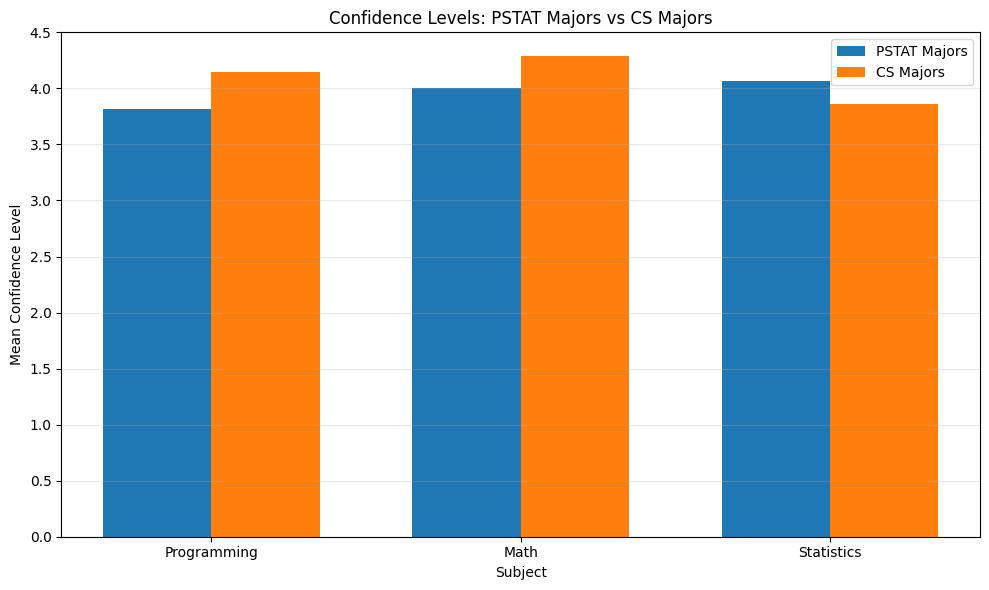

In [ ]:
#Create a bar plot comparing confidence levels between PSTAT and CS majors
confidence_vars = ['prog.comf', 'math.comf', 'stat.comf']

means_took = pstat_df[confidence_vars].mean()
means_didnt = cs_df[confidence_vars].mean()

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(confidence_vars))
width = 0.35

bars1 = ax.bar(x - width/2, means_took, width, label='PSTAT Majors')
bars2 = ax.bar(x + width/2, means_didnt, width, label='CS Majors')

ax.set_xlabel('Subject')
ax.set_ylabel('Mean Confidence Level')
ax.set_title('Confidence Levels: PSTAT Majors vs CS Majors')
ax.set_xticks(x)
ax.set_xticklabels(['Programming', 'Math', 'Statistics'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

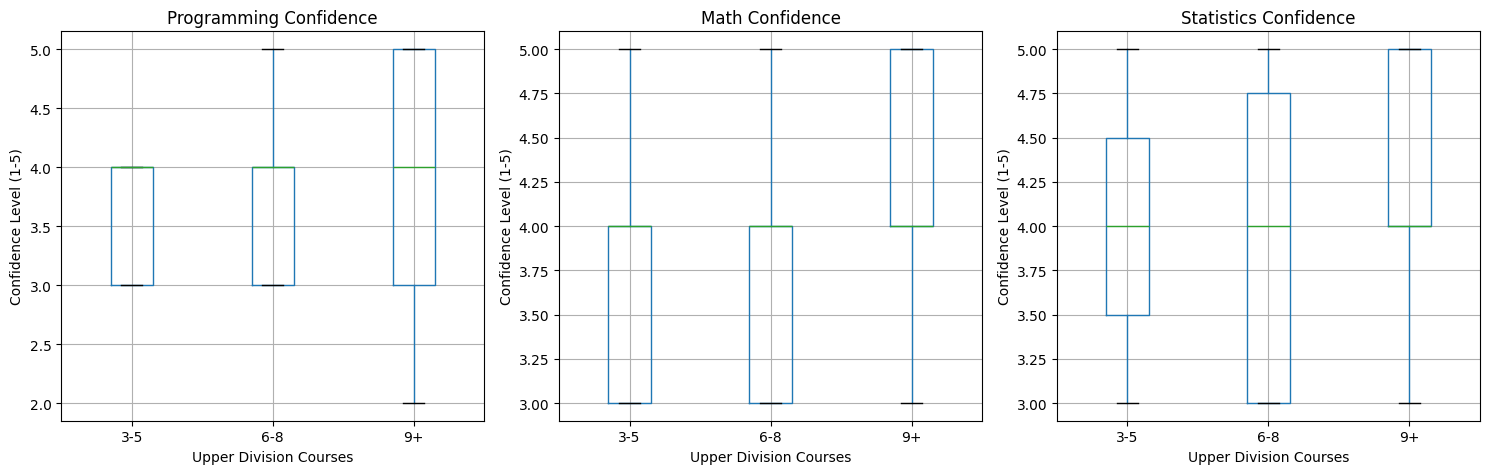

In [ ]:
#Creata a box plot to see if confidence level increases with increased number of upper div courses - PSTAT students
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

confidence_vars = ['prog.comf', 'math.comf', 'stat.comf']
titles = ['Programming Confidence', 'Math Confidence', 'Statistics Confidence']

for i, (var, title) in enumerate(zip(confidence_vars, titles)):
    pstat_df.boxplot(column=var, by='updv.num', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Upper Division Courses')
    axes[i].set_ylabel('Confidence Level (1-5)')
    axes[i].get_figure().suptitle('')

plt.tight_layout()
plt.show()

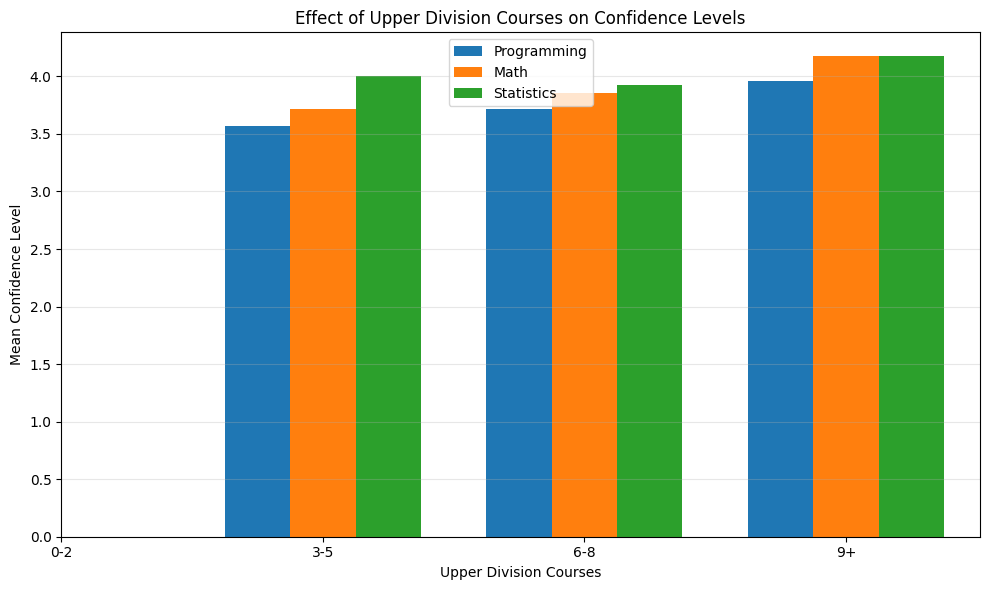

In [ ]:
#Bar plot to see if confidence level increases with increased number of upper div courses - PSTAT students
confidence_vars = ['prog.comf', 'math.comf', 'stat.comf']
categories = ['0-2', '3-5', '6-8', '9+']

means = pstat_df.groupby('updv.num')[confidence_vars].mean()

means = means.reindex(categories)

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(categories))
width = 0.25

bars1 = ax.bar(x - width, means['prog.comf'], width, label='Programming')
bars2 = ax.bar(x, means['math.comf'], width, label='Math')
bars3 = ax.bar(x + width, means['stat.comf'], width, label='Statistics')

ax.set_xlabel('Upper Division Courses')
ax.set_ylabel('Mean Confidence Level')
ax.set_title('Effect of Upper Division Courses on Confidence Levels')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()